In [1]:
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in the data
df = pd.read_csv("Resources/runner_result_runner_result.csv")
df = df.drop(columns="Unnamed: 0")
df

,meetingName,meetingDate,raceNumber,runnerNumber,location,weatherCondition,trackCondition,raceName,raceStartTime,raceDistance,...,track (rider wins),region (rider wins),last30Days (rider wins),last12Months (rider wins),runner (rider wins),track (rider placings),region (rider placings),last30Days (rider placings),last12Months (rider placings),runner (rider placings)
0,STONY CREEK,01/02/2022 12:00:00 AM,1,3,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,7,12,135,0,0,6,33,229,0
1,STONY CREEK,01/02/2022 12:00:00 AM,1,11,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,0,0,0,0,0,0,0,0,0
2,STONY CREEK,01/02/2022 12:00:00 AM,1,2,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,2,16,6,38,0,3,21,11,104,0
3,STONY CREEK,01/02/2022 12:00:00 AM,1,9,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,2,12,8,93,0,1,28,11,176,1
4,STONY CREEK,01/02/2022 12:00:00 AM,1,8,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,8,3,56,0,7,18,1,110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,YORK,19/05/2022 12:00:00 AM,8,5,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,2,7,57,0,2,7,11,147,0
13184,YORK,19/05/2022 12:00:00 AM,8,4,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,13,1,66,0,0,11,4,132,0
13185,YORK,19/05/2022 12:00:00 AM,8,7,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,1,7,3,28,0,6,12,3,56,0
13186,YORK,19/05/2022 12:00:00 AM,8,6,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,13,3,47,0,4,18,9,101,0


In [3]:
# Convert categorical features to numerical
weatherCondition = pd.get_dummies(df.weatherCondition, sparse=True)
trackCondition = pd.get_dummies(df.trackCondition, sparse=True)
meetingName = pd.get_dummies(df.meetingName, sparse=True)
runnerNumber = pd.get_dummies(df.runnerNumber, sparse=True)
raceClassConditions = pd.get_dummies(df.raceClassConditions, sparse=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the 'runnerName' column
df['runnerName_encoded'] = label_encoder.fit_transform(df['runnerName'])

# Create a mapping of original names to encoded labels for future reference
name_to_label_mapping = dict(zip(df['runnerName'], df['runnerName_encoded']))



In [5]:
import json

# Save the mapping to a JSON file
with open('name_to_label_mapping.json', 'w') as file:
    json.dump(name_to_label_mapping, file)


In [6]:
#unique_runners = X['runnerName'].nunique()
#print(f"There are {unique_runners} unique runner names in the dataset.")

#df.info()

In [7]:
# Combine the features of interest into a dataframe
X = pd.concat([weatherCondition,
               trackCondition,
               meetingName,
               runnerNumber,
               raceClassConditions,
               df.raceDistance,
               df.finishingPosition,
               df.runnerName_encoded
              ],axis=1)

print(f"Shape of feature vector before cleaning: {X.size}")
# Drop any nans (maybe check why they are there)
X = X.dropna()
print(f"Shape of feature vector after cleaning: {X.size}")

X.columns = X.columns.astype(str)


Shape of feature vector before cleaning: 3376128
Shape of feature vector after cleaning: 3333632


In [8]:
#pd.set_option('display.max_columns', None)
#print(X)

In [9]:
# Scale the data
scaled_data = StandardScaler().fit_transform(X)



/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [10]:
k = list(range(1, 20))
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0,n_init='auto')
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k,"inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [11]:
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
elbow_plot

:Curve   [k]   (inertia)

In [12]:
import seaborn as sns

In [13]:
#sns.pairplot()

In [14]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)

# market_pca_data = pca.fit_transform(scaled_data)
# pca.explained_variance_ratio_

In [15]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=10, random_state=0, n_init='auto')

# Fit the K-Means model using the scaled data
model.fit(scaled_data)

# Predict the clusters to group the horses using the scaled data
horse_clusters = model.predict(scaled_data)

# View the resulting array of cluster values.
print(horse_clusters)

# Create a copy of the DataFrame
scaled_predictions = X.copy()

# Add a new column to the DataFrame with the predicted clusters
scaled_predictions["horse_clusters"] = horse_clusters

# Display sample data
scaled_predictions

[7 7 7 ... 7 7 7]


,FINE,OCAST,RAIN,SHWRY,AWT,FAST,GOOD,GOOD3,GOOD4,HVY10,...,STEEPL,SWP-G3,WFA,WFA-G1,WFA-G2,WFA-G3,raceDistance,finishingPosition,runnerName_encoded,horse_clusters
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,1100,4.0,2876,7
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,1100,-2.0,7051,7
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,1100,0.0,1198,7
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,1100,-2.0,5173,7
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,1100,1.0,4381,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,1300,2.0,2555,7
13184,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,1300,4.0,6203,7
13185,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,1300,0.0,6035,7
13186,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,1300,1.0,2886,7


In [16]:
clusters_plot = scaled_predictions.hvplot.scatter(
    x="finishingPosition",
    y="raceDistance",
    by="horse_clusters",
)
clusters_plot

:NdOverlay   [horse_clusters]
   :Scatter   [finishingPosition]   (raceDistance)

In [17]:
# Convert finishingPosition to binary: 1 if the horse placed (1-4), 0 otherwise
X['finishingPosition'] = X['finishingPosition'].apply(lambda x: 1 if 1.0 <= x <= 3.0 else 0)


In [18]:
# things to do 


In [19]:
from sklearn.model_selection import train_test_split

# Features and target variable
y = X['finishingPosition']
X_features = X.drop('finishingPosition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=1)

In [20]:
#X_features = X.drop('finishingPosition', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=1)

In [21]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(48, activation='relu'))  # Hidden layer
model.add(Dense(24, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
326/326 [==============================] - 0s 819us/step - loss: 8.7490 - accuracy: 0.6863 - val_loss: 0.6198 - val_accuracy: 0.7750
Epoch 2/50
326/326 [==============================] - 0s 603us/step - loss: 0.9007 - accuracy: 0.7048 - val_loss: 0.7578 - val_accuracy: 0.5144
Epoch 3/50
326/326 [==============================] - 0s 611us/step - loss: 0.8370 - accuracy: 0.7147 - val_loss: 0.9064 - val_accuracy: 0.7846
Epoch 4/50
326/326 [==============================] - 0s 598us/step - loss: 0.7494 - accuracy: 0.7173 - val_loss: 0.6973 - val_accuracy: 0.7846
Epoch 5/50
326/326 [==============================] - 0s 605us/step - loss: 0.6580 - accuracy: 0.7513 - val_loss: 0.5256 - val_accuracy: 0.7846
Epoch 6/50
326/326 [==============================] - 0s 601us/step - loss: 0.7299 - accuracy: 0.7360 - val_loss: 0.6301 - val_accuracy: 0.7846
Epoch 7/50
326/326 [==============================] - 0s 604us/step - loss: 0.6604 - accuracy: 0.7417 - val_loss: 0.6200 - val_accuracy:

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


82/82 [==============================] - 0s 283us/step - loss: 0.5210 - accuracy: 0.7846
Test Loss: 0.5210
Test Accuracy: 0.7846


In [27]:
model.save("horsey_model_for_aws_v1.h5")

/Users/darcy5d/miniforge3/envs/tensor/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
y_pred_probs = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]


82/82 [==============================] - 0s 294us/step


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


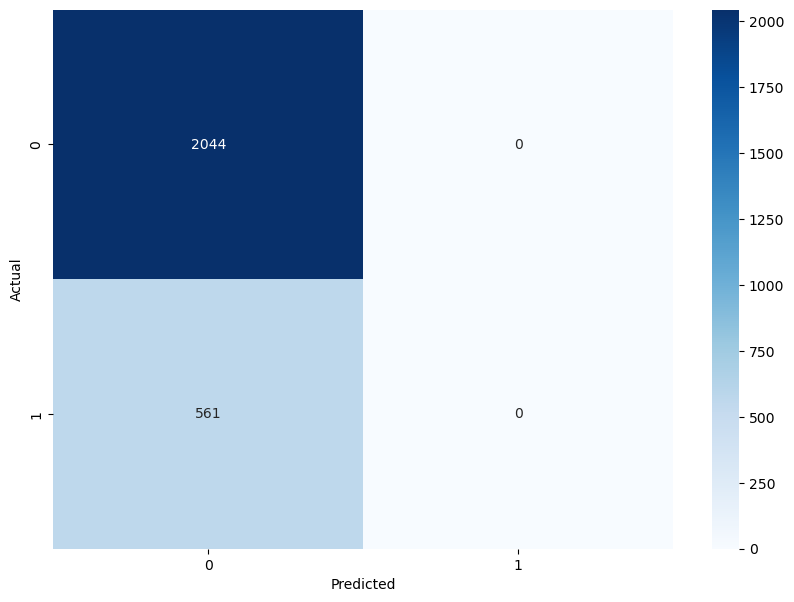

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
### RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [34]:
rf_model = rf_model.fit(X_train, y_train)

In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7700575815738964

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      2044
         1.0       0.29      0.05      0.08       561

    accuracy                           0.77      2605
   macro avg       0.54      0.51      0.48      2605
weighted avg       0.68      0.77      0.70      2605


Confusion Matrix:
 [[1979   65]
 [ 534   27]]


In [37]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': importances
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                 Feature  Importance
254   runnerName_encoded    0.197169
253         raceDistance    0.099229
106                    8    0.018274
104                    6    0.017422
105                    7    0.017281
..                   ...         ...
172               3YO-SW    0.000255
120                   22    0.000027
121                   23    0.000006
122                   24    0.000003
76   RANDWICK KENSINGTON    0.000000

[255 rows x 2 columns]


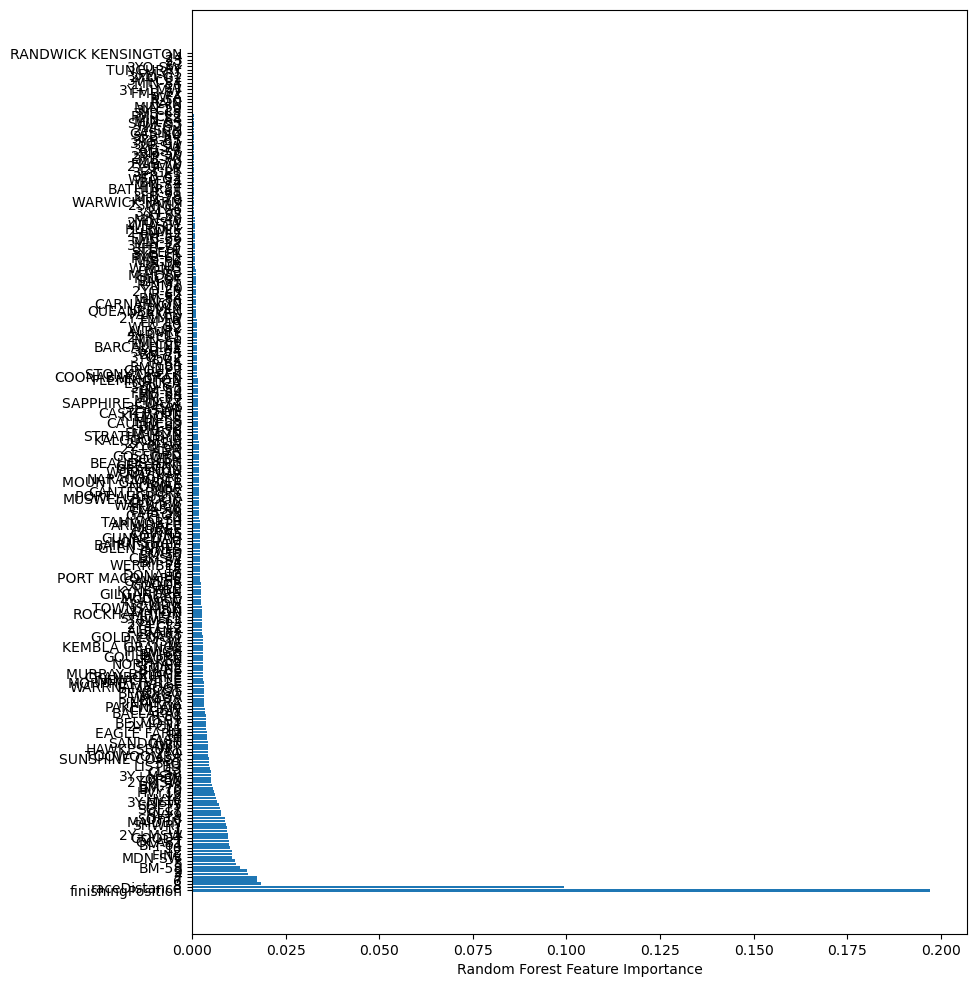

In [38]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order and plot
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [39]:
print(feature_importance[0:30])

                Feature  Importance
254  runnerName_encoded    0.197169
253        raceDistance    0.099229
106                   8    0.018274
104                   6    0.017422
105                   7    0.017281
102                   4    0.014810
107                   9    0.014590
180               BM-58    0.012674
103                   5    0.011693
101                   3    0.011548
225              MDN-SW    0.010703
0                  FINE    0.010621
100                   2    0.010530
108                  10    0.010225
183               BM-64    0.009985
1                 OCAST    0.009981
8                 GOOD4    0.009652
134              2Y+MSW    0.009616
99                    1    0.009421
109                  11    0.009355
3                 SHWRY    0.008926
224              MAIDEN    0.008915
13                SOFT6    0.008674
11                 HVY9    0.007814
199                CLS1    0.007697
14                SOFT7    0.007424
12                SOFT5    0

In [40]:
feature_importance['Feature'][:20].to_list()

['runnerName_encoded',
 'raceDistance',
 '8',
 '6',
 '7',
 '4',
 '9',
 'BM-58',
 '5',
 '3',
 'MDN-SW',
 'FINE',
 '2',
 '10',
 'BM-64',
 'OCAST',
 'GOOD4',
 '2Y+MSW',
 '1',
 '11']

In [ ]:
#X = X[feature_importance['Feature'][:20].to_list()]